In [1]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G, sigma_sb, c

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run Binary_Data_Clean.py
%run Binary_Fraction.py

I've already done a lot of the table clean stuff, so the only thing left to do right now is to add the RV values

In [3]:
Tables = Binary_Data_Clean('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.nocut.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [4]:
AllAvg, AllVis, ISO = Tables.load_tables()

In [6]:
AllVis = Tables.too_fast(AllVis)
AAS_RG = Tables.rg_cut(AllAvg)

In [7]:
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO)

In [8]:
AAS_RG_ISO_5, AllVisSimp5 = Tables.nvisits_cut(AAS_RG_ISO,AllVis,5)
AAS_RG_ISO_4, AllVisSimp4 = Tables.nvisits_cut(AAS_RG_ISO,AllVis,4)
AAS_RG_ISO_4['NVISITS'][1290] = 5 #For some reason NVISITS for this star is 4, but there are 5 points in AllVis, so...

In [9]:
AAS_RG_ISO_5_RV = Tables.rv_table_add(AAS_RG_ISO_5,AllVisSimp5)
AAS_RG_ISO_4_RV = Tables.rv_table_add(AAS_RG_ISO_4,AllVisSimp4)

In [ ]:
sum(AAS_RG_ISO_4['NVISITS']), len(AllVisSimp4)

In [10]:
AllAvg_LMC_5 = Tables.mc_cut(AAS_RG_ISO_5_RV, 'L')
AllAvg_SMC_5 = Tables.mc_cut(AAS_RG_ISO_5_RV, 'S')
AllAvg_LMC_4 = Tables.mc_cut(AAS_RG_ISO_4_RV, 'L')
AllAvg_SMC_4 = Tables.mc_cut(AAS_RG_ISO_4_RV, 'S')

In [ ]:
for N in AllAvg_LMC_4['RADIAL_DATE']:
    if any(t < 0 for t in N):
        print('Problem', N)

In [ ]:
for N in range(len(AllAvg_LMC_4)):
    if any(t < 0 for t in AllAvg_LMC_4['RADIAL_DATE'][N]):
        print('Problem', N,AllAvg_LMC_4['APOGEE_ID'][N])

In [ ]:
524 + len(AllAvg_SMC_4)

In [ ]:
AllVisSimp4[:][AllVisSimp4['APOGEE_ID'] ==  '2M04574128-7055016']

In [11]:
%run Binary_Fraction.py
thing_LMC_5 = Binary_Fraction(AllAvg_LMC_5)
thing_SMC_5 = Binary_Fraction(AllAvg_SMC_5)

thing_LMC_4 = Binary_Fraction(AllAvg_LMC_4)
thing_SMC_4 = Binary_Fraction(AllAvg_SMC_4)

In [12]:
p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC = thing_LMC_5.synthetic_detection_rate(200,'U',True,False,[0,1],10)
p_value_result_SMC, binary_result_SMC,  detection_rate_SMC, errors_SMC = thing_SMC_5.synthetic_detection_rate(200,'U',True,False,[0,1],10)

In [13]:
real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC = thing_LMC_5.Real_Data_Fraction()
real_data_detection_SMC_5, binary_bool_SMC_5, SMC_binary_detection_5,rd_err_SMC = thing_SMC_5.Real_Data_Fraction()

In [ ]:
rd_err_LMC

In [ ]:
rd_err_LMC[0]

In [ ]:
binary_result_LMC_200_UP[1]

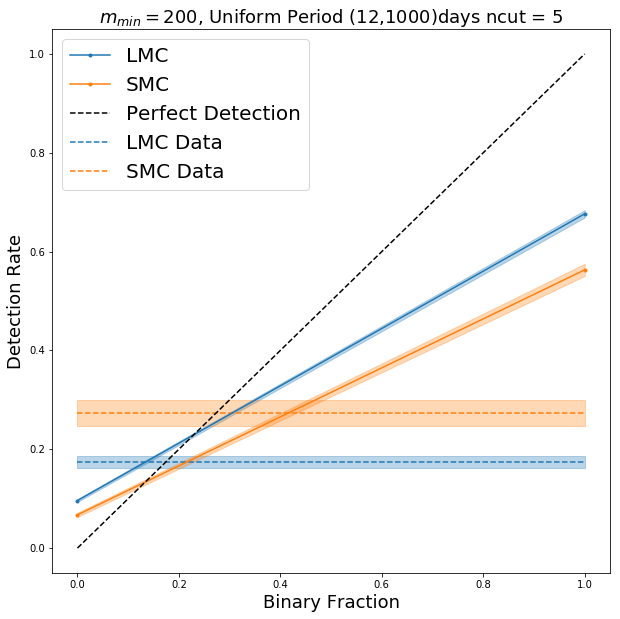

In [15]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_LMC,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection_5, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1], [errors_LMC[0][1],errors_LMC[1][1]], [errors_LMC[0][0], errors_LMC[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_LMC[0][0], rd_err_LMC[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')


plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period (12,1000)days ncut = 5', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [16]:
thing_LMC_4 = Binary_Fraction(AllAvg_LMC_4)
thing_SMC_4 = Binary_Fraction(AllAvg_SMC_4)

p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC = thing_LMC_4.synthetic_detection_rate(200,'U',True,False,[0,1],10)
p_value_result_SMC, binary_result_SMC,  detection_rate_SMC, errors_SMC = thing_SMC_4.synthetic_detection_rate(200,'U',True,False,[0,1],10)

real_data_detection_LMC_4, binary_bool_LMC_4, LMC_binary_detection_4, rd_err_LMC = thing_LMC_4.Real_Data_Fraction()
real_data_detection_SMC_4, binary_bool_SMC_4, SMC_binary_detection_4,rd_err_SMC = thing_SMC_4.Real_Data_Fraction()

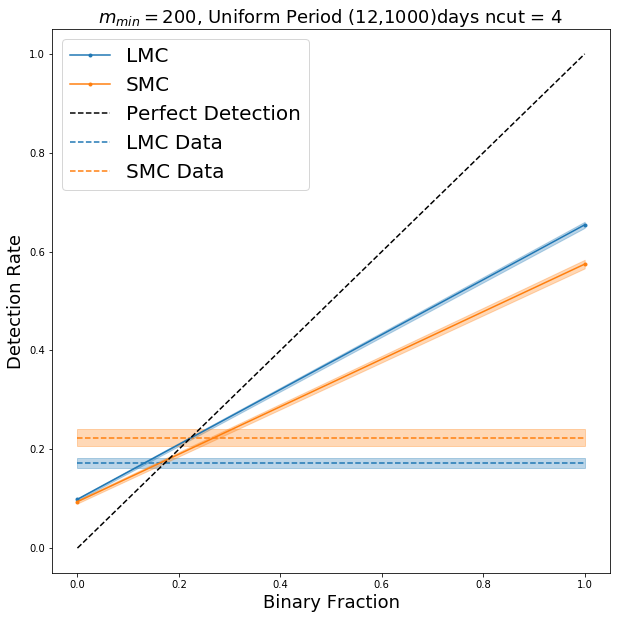

In [17]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_LMC,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection_4, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1], [errors_LMC[0][1],errors_LMC[1][1]], [errors_LMC[0][0], errors_LMC[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_LMC[0][0], rd_err_LMC[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection_4, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period (12,1000)days ncut = 4', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

# 2dHist
I want to make the 2dhist I had on the poster so....lets figure out how to do that

In [ ]:
LMC_Fake_Table_L = thing_LMC.Synthetic_Table(200,'L',True,False,10)
LMC_Fake_Table_U = thing_LMC.Synthetic_Table(200,'U',True,False,10)

All the crap below here is stuff from my older codes. I don't remember how this works but it makes a nice histogram of the acceptance paramiters so I haven't messed with it. At some point I should go through this and make it less of an abomination

In [ ]:
BTF_a_SMC = []
BTF_mi_SMC = []

BTF_a_no_SMC = []
BTF_mi_no_SMC = []

BTF_a_all_SMC = SMC_Fake_Table['a']
m_all_SMC = SMC_Fake_Table['m']*u.jupiterMass
m_all_SMC = m_all_SMC.to(u.solMass)
m_all_SMC = m_all_SMC.value

i_all_SMC = SMC_Fake_Table['i']

BTF_mi_all_SMC = m_all_SMC * np.sin(i_all_SMC)

for n in range(len(SMC_Fake_Table)):
    if SMC_Fake_Table["Binary"][n]:
        BTF_a_SMC.append(SMC_Fake_Table['a'][n])
        m = SMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        
        i = SMC_Fake_Table['i'][n]
        BTF_mi_SMC.append(m*np.sin(i))
    else:
        BTF_a_no_SMC.append(SMC_Fake_Table['a'][n])
        m = SMC_Fake_Table['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        i = SMC_Fake_Table['i'][n]
        BTF_mi_no_SMC.append(m*np.sin(i))
fig, ax = plt.subplots(1,1, figsize = (20,10))      
ax.scatter(BTF_a_SMC, BTF_mi_SMC, label = 'accepted',alpha = 0.4)
ax.scatter(BTF_a_no_SMC, BTF_mi_no_SMC,alpha = 0.4, label = 'rejected')
ax.set_title('Detection Rate of Synthetic Binaries SMC',fontsize = 18)
ax.set_ylabel('$m*\sin(i)$', fontsize = 18)
ax.set_xlabel('$a$ (AU)', fontsize = 18)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()        

In [ ]:
#BTF_mi_all_SMC = BTF_mi_all_SMC*u.jupiterMass
#BTF_mi_all_SMC = BTF_mi_all_SMC.to(u.solMass)
#BTF_mi_all_SMC = BTF_mi_all_SMC.value
H_all, xed,yed, image = plt.hist2d(BTF_a_all_SMC,BTF_mi_all_SMC, bins = [np.logspace(-1.5,1.3,40), np.linspace(0,1.5,40) ])


#BTF_mi_SMC = BTF_mi_SMC*u.jupiterMass
#BTF_mi_SMC = BTF_mi_SMC.to(u.solMass)
#BTF_mi_SMC = BTF_mi_SMC.value
H_ac, xed2,yed2,image2 = plt.hist2d(BTF_a_SMC,BTF_mi_SMC, bins = [np.logspace(-1.5,1.3,40), np.linspace(0,1.5,40) ])

fig = plt.figure(figsize=(14,10))
#plt.hist2d(H_ac/(H_all+0.001), bins =[np.logspace(-1,1,5), np.linspace(0,1000,5) ] )
#plt.xscale("log")
#plt.xlabel('a (AU)')
#plt.ylabel('$m*\sin(i)$')
##plt.yscale('log')
#plt.colorbar()
#plt.show()
X, Y = np.meshgrid(xed, yed)
plt.pcolormesh(X, Y, H_ac.T/(H_all.T+0.001))
plt.xscale("log")
plt.xlabel('a (AU)', fontsize = 30)
plt.ylabel('$m*\sin(i)$  $(M_{\odot})$',fontsize = 30)
plt.title('Detection Rate of Synthetic Binaries (SMC)', fontsize = 30)
plt.tick_params(axis='both',which = 'major', labelsize = 26)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 18)
fig.savefig('detection binary hist SMC.png')

In [ ]:
BTF_a_LMC = []
BTF_mi_LMC = []

BTF_a_no_LMC = []
BTF_mi_no_LMC = []

BTF_a_all_LMC = LMC_Fake_Table_L['a']
m_all_LMC = LMC_Fake_Table_L['m']*u.jupiterMass
m_all_LMC = m_all_LMC.to(u.solMass)
m_all_LMC = m_all_LMC.value

i_all_LMC = LMC_Fake_Table_L['i']

BTF_mi_all_LMC = m_all_LMC * np.sin(i_all_LMC)

for n in range(len(LMC_Fake_Table_L)):
    if LMC_Fake_Table_L["Binary"][n]:
        BTF_a_LMC.append(LMC_Fake_Table_L['a'][n])
        m = LMC_Fake_Table_L['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        
        i = LMC_Fake_Table_L['i'][n]
        BTF_mi_LMC.append(m*np.sin(i))
    else:
        BTF_a_no_LMC.append(LMC_Fake_Table_L['a'][n])
        m = LMC_Fake_Table_L['m'][n]*u.jupiterMass
        m = m.to(u.solMass)
        m = m.value
        i = LMC_Fake_Table_L['i'][n]
        BTF_mi_no_LMC.append(m*np.sin(i))
fig, ax = plt.subplots(1,1, figsize = (20,10))      
ax.scatter(BTF_a_LMC, BTF_mi_LMC, label = 'accepted',alpha = 0.4)
ax.scatter(BTF_a_no_LMC, BTF_mi_no_LMC,alpha = 0.4, label = 'rejected')
ax.set_title('Detection Rate of Synthetic Binaries LMC',fontsize = 18)
ax.set_ylabel('$m*\sin(i)$', fontsize = 18)
ax.set_xlabel('$a$ (AU)', fontsize = 18)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()        

In [ ]:
#BTF_mi_all_SMC = BTF_mi_all_SMC*u.jupiterMass
#BTF_mi_all_SMC = BTF_mi_all_SMC.to(u.solMass)
#BTF_mi_all_SMC = BTF_mi_all_SMC.value
H_all, xed,yed, image = plt.hist2d(BTF_a_all_LMC,BTF_mi_all_LMC, bins = [np.logspace(-2,1.5,40), np.linspace(0,1.6,40) ])


#BTF_mi_SMC = BTF_mi_SMC*u.jupiterMass
#BTF_mi_SMC = BTF_mi_SMC.to(u.solMass)
#BTF_mi_SMC = BTF_mi_SMC.value
H_ac, xed2,yed2,image2 = plt.hist2d(BTF_a_LMC,BTF_mi_LMC, bins = [np.logspace(-2,1.5,40), np.linspace(0,1.6,40) ])

fig = plt.figure(figsize=(14,10))
#plt.hist2d(H_ac/(H_all+0.001), bins =[np.logspace(-1,1,5), np.linspace(0,1000,5) ] )
#plt.xscale("log")
#plt.xlabel('a (AU)')
#plt.ylabel('$m*\sin(i)$')
##plt.yscale('log')
#plt.colorbar()
#plt.show()
X, Y = np.meshgrid(xed, yed)
plt.pcolormesh(X, Y, H_ac.T/(H_all.T+0.001))
plt.xscale("log")
plt.xlabel('a (AU)', fontsize = 30)
plt.ylabel('$m*\sin(\i)$  $(M_{\odot})$',fontsize = 30)
plt.title('Detection Rate of Synthetic Binaries (LMC)', fontsize = 30)
plt.tick_params(axis='both',which = 'major', labelsize = 26)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 18)
fig.savefig('detection binary hist LMC.png')

I want to look at the period distribution of Uniform vs log normal. I'm surprised the lognormal distribution gives a higher acceptance rate at 1 than the uniform

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### I want to mess around with other 'nvisits' cut offs. So i'm going to restart the kernal. And at this point I think I'm going to set the nvisit cut off to be varriable that you can set so I don't have to keep changing things everytime I want to run this.  

In [ ]:
import warnings
warnings.filterwarnings('ignore')
Tables = Binary_Data_Clean('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.nocut.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.load_tables()

In [ ]:
%run Binary_Data_Clean.py
%run Binary_Fraction.py

In [ ]:
AAS_RG_ISO_4, AllVisSimp = Tables.nvisits_cut(AAS_RG_ISO,AllVis,4)

In [ ]:
AAS_RG_ISO_4_RV = Tables.rv_table_add(AAS_RG_ISO_4,AllVisSimp)

In [ ]:
for N in AAS_RG_ISO_4_RV['RADIAL_DATE']:
    if any(t < 0 for t in N):
        print('Problem', N)

In [ ]:
AAS_RG_ISO_4_RV['RADIAL_DATE']

In [ ]:
AllAvg_LMC_4 = Tables.mc_cut(AAS_RG_ISO_4_RV, 'L')
AllAvg_SMC_4 = Tables.mc_cut(AAS_RG_ISO_4_RV, 'S')

In [ ]:
thing_LMC_4 = Binary_Fraction(AllAvg_LMC_4)
thing_SMC_4 = Binary_Fraction(AllAvg_SMC_4)

In [ ]:
p_value_result_LMC_200_UP4, binary_result_LMC_200_UP4,  detection_rate_LMC_200_UP4 = thing_LMC_4.synthetic_detection_rate(200,'U',True,False,[0,1],30)
p_value_result_SMC_200_UP4, binary_result_SMC_200_UP4,  detection_rate_SMC_200_UP4 = thing_SMC_4.synthetic_detection_rate(200,'U',True,False,[0,1],30)

In [ ]:
real_data_detection_LMC_4, binary_bool_LMC_4 = thing_LMC_4.Real_Data_Fraction()
real_data_detection_SMC_4, binary_bool_SMC_4 = thing_SMC_4.Real_Data_Fraction()
LMC_binary_detection_4 = np.count_nonzero(binary_bool_LMC_4)/len(binary_bool_LMC_4)
SMC_binary_detection_4 = np.count_nonzero(binary_bool_SMC_4)/len(binary_bool_SMC_4)

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(b_frac, detection_rate_LMC_200_UP4,'.-', color = 'C0', label = 'LMC')
plt.hlines(LMC_binary_detection_4, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.plot(b_frac, detection_rate_SMC_200_UP4, '.-', color = 'C1', label = 'SMC')
plt.hlines(SMC_binary_detection_4, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, Uniform Period (12,1000)days, nvisits $\greater = 4$', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

Something wierd happened when I added NVISITS = 4 into the group. So I'm going to plot out just the starts with NVISITS = 4, to see WTF happenend. 

### Things to do
##### Add Errors
##### Metalicity Cut between the two. 
##### Remove points from the data set. 
##### Milky Way stars, large table stuff

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
binary_count0LMC = np.count_nonzero(binary_result_LMC_200_UP[0])
binary_count1LMC = np.count_nonzero(binary_result_LMC_200_UP[1])
binary_countLMC = np.array([binary_count0LMC, binary_count1LMC])
print(binary_count0LMC, binary_count1LMC)
binary_count0LMC = np.count_nonzero(binary_result_LMC_200_UP[0])
binary_count1LMC = np.count_nonzero(binary_result_LMC_200_UP[1])
binary_countLMC = np.array([binary_count0LMC, binary_count1LMC])
print(binary_count0LMC, binary_count1LMC)

binary_count0SMC = np.count_nonzero(binary_result_SMC_200_UP[0])
binary_count1SMC = np.count_nonzero(binary_result_SMC_200_UP[1])
binary_countSMC = np.array([binary_count0SMC, binary_count1SMC])
print(binary_count0SMC, binary_count1SMC)
binary_count0SMC = np.count_nonzero(binary_result_SMC_200_UP[0])
binary_count1SMC = np.count_nonzero(binary_result_SMC_200_UP[1])
binary_countSMC = np.array([binary_count0SMC, binary_count1SMC])
print(binary_count0SMC, binary_count1SMC)

In [ ]:
len(binary_result_LMC_200_UP[0]), len(binary_result_LMC_200_UP[1])

In [ ]:
#I'm just going to use shot noise for the errors. 
binary_err0LMC = np.sqrt(binary_count0LMC)
binary_err1LMC = np.sqrt(binary_count1LMC)
binary_err_arrayLMC = np.array([binary_err0LMC, binary_err1LMC])


#I'm just going to use shot noise for the errors. 
binary_err0SMC = np.sqrt(binary_count0SMC)
binary_err1SMC = np.sqrt(binary_count1SMC)
binary_err_arraySMC = np.array([binary_err0SMC, binary_err1SMC])


In [ ]:
#Get upper and lower bound on LMC error.
upper_lmc_binary_count = binary_countLMC + binary_err_arrayLMC
upper_errorLMC = upper_lmc_binary_count/len(binary_result_LMC_200_UP[0])

lower_lmc_binary_count = binary_countLMC - binary_err_arrayLMC
lower_errorLMC = lower_lmc_binary_count/len(binary_result_LMC_200_UP[0]) 

upper_smc_binary_count = binary_countSMC + binary_err_arraySMC
upper_errorSMC = upper_smc_binary_count/len(binary_result_SMC_200_UP[0])

lower_smc_binary_count = binary_countSMC - binary_err_arraySMC
lower_errorSMC = lower_smc_binary_count/len(binary_result_SMC_200_UP[0]) 

### Real data errors. 
Done, see above sections

##### Metalicity Cut between the two. 
I want to look at just LMC stars (larger sample) cut them equal chuncks by metalicity and see what the acceptance rate looks like. 

Looks like the metalicity cut should be around -0.67 for the FE_H lines

In [ ]:
import matplotlib.pyplot as plt
bin_stuff = plt.hist(AllAvg_LMC_5['FE_H'],bins = 'auto')

In [ ]:
 plt.hist(AllAvg_SMC_5['FE_H'],bins = 'auto')

In [ ]:
foo = 0
n = 0
while foo < sum(bin_stuff[0])/2:
    foo += bin_stuff[0][n]
    n+= 1
    print(foo, n)

In [ ]:
bin_stuff[1][19]

Looks like the metalicity cut should be around -0.67 for the FE_H lines

In [18]:
cut_off = -0.67
AllAvg_LMC_5_high_metal = AllAvg_LMC_5[:][AllAvg_LMC_5['FE_H'] >= cut_off]
AllAvg_LMC_5_low_metal = AllAvg_LMC_5[:][AllAvg_LMC_5['FE_H'] < cut_off]
cut_off2 = -1.12
AllAvg_SMC_5_high_metal = AllAvg_SMC_5[:][AllAvg_SMC_5['FE_H'] >= cut_off2]
AllAvg_SMC_5_low_metal = AllAvg_SMC_5[:][AllAvg_SMC_5['FE_H'] < cut_off2]
len(AllAvg_LMC_5_high_metal),len(AllAvg_LMC_5_low_metal), len(AllAvg_SMC_5_high_metal),len(AllAvg_SMC_5_low_metal)

(628, 610, 188, 185)

In [ ]:
AllAvg_LMC_5_low_metal

In [19]:
thing_LMC_5_hm = Binary_Fraction(AllAvg_LMC_5_high_metal)
thing_LMC_5_lm = Binary_Fraction(AllAvg_LMC_5_low_metal)

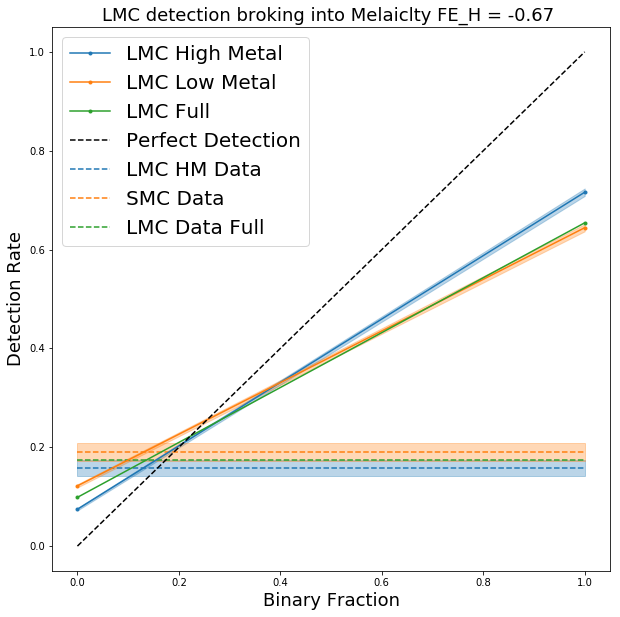

In [20]:
thing_LMC_5_hm = Binary_Fraction(AllAvg_LMC_5_high_metal)
thing_LMC_5_lm = Binary_Fraction(AllAvg_LMC_5_low_metal)

p_value_result_hm, binary_result_hm,  detection_rate_hm, errors_hm = thing_LMC_5_hm.synthetic_detection_rate(200,'U',True,False,[0,1],20)
p_value_result_lm, binary_result_lm,  detection_rate_lm, errors_lm = thing_LMC_5_lm.synthetic_detection_rate(200,'U',True,False,[0,1],20)

real_data_detection_hm, binary_bool_hm, binary_detection_hm, rd_err_hm = thing_LMC_5_hm.Real_Data_Fraction()
real_data_detection_lm, binary_bool_lm, binary_detection_lm, rd_err_lm = thing_LMC_5_lm.Real_Data_Fraction()

plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_hm,'.-', color = 'C0', label = 'LMC High Metal')
plt.hlines(binary_detection_hm, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC HM Data')
plt.fill_between([0,1], [errors_hm[0][1],errors_hm[1][1]], [errors_hm[0][0], errors_hm[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_hm[0][0], rd_err_hm[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_lm, '.-', color = 'C1', label = 'LMC Low Metal')
plt.hlines(binary_detection_lm, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1], [errors_lm[0][1],errors_lm[1][1]], [errors_lm[0][0], errors_lm[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_lm[0][0], rd_err_lm[0][1], alpha = 0.3, color = 'C1')

plt.plot(b_frac, detection_rate_LMC,'.-', color = 'C2', label = 'LMC Full')
plt.hlines(LMC_binary_detection_5, 0 ,1, color = 'C2', linestyles='dashed', label = 'LMC Data Full')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('LMC detection broking into Melaiclty FE_H = -0.67 ', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

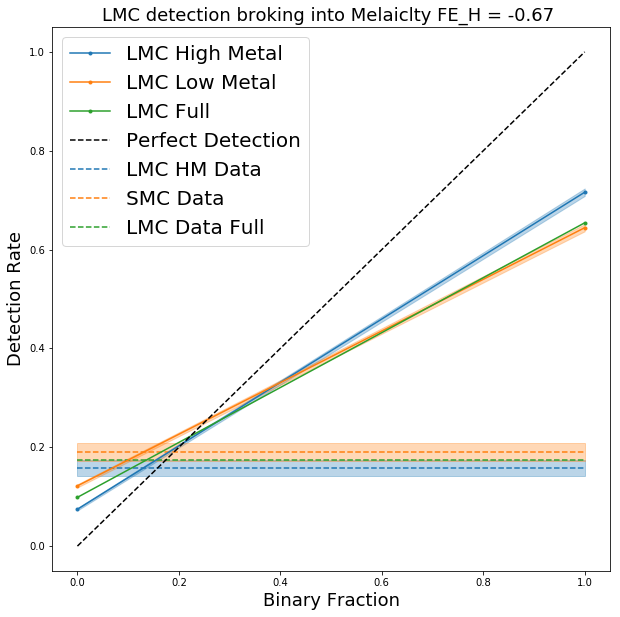

In [21]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_hm,'.-', color = 'C0', label = 'LMC High Metal')
plt.hlines(binary_detection_hm, 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC HM Data')
plt.fill_between([0,1], [errors_hm[0][1],errors_hm[1][1]], [errors_hm[0][0], errors_hm[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_hm[0][0], rd_err_hm[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_lm, '.-', color = 'C1', label = 'LMC Low Metal')
plt.hlines(binary_detection_lm, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1], [errors_lm[0][1],errors_lm[1][1]], [errors_lm[0][0], errors_lm[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_lm[0][0], rd_err_lm[0][1], alpha = 0.3, color = 'C1')

plt.plot(b_frac, detection_rate_LMC,'.-', color = 'C2', label = 'LMC Full')
plt.hlines(LMC_binary_detection_5, 0 ,1, color = 'C2', linestyles='dashed', label = 'LMC Data Full')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('LMC detection broking into Melaiclty FE_H = -0.67 ', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

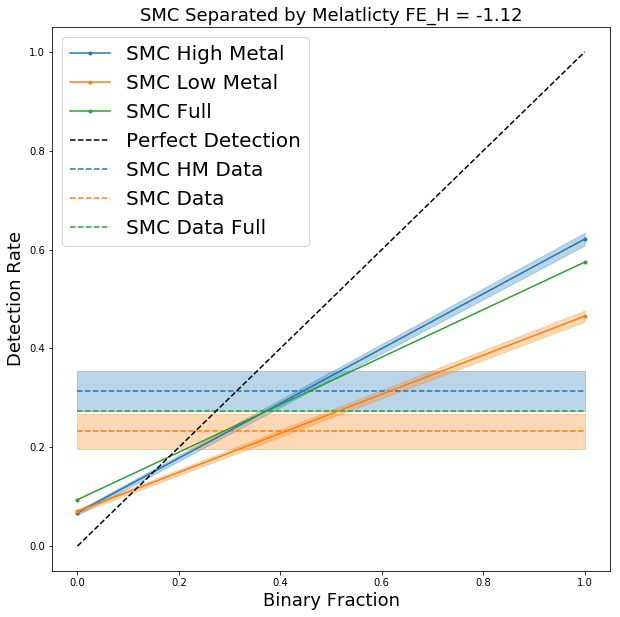

In [23]:
thing_SMC_5_hm = Binary_Fraction(AllAvg_SMC_5_high_metal)
thing_SMC_5_lm = Binary_Fraction(AllAvg_SMC_5_low_metal)

p_value_result_hm, binary_result_hm,  detection_rate_hm, errors_hm = thing_SMC_5_hm.synthetic_detection_rate(200,'U',True,False,[0,1],20)
p_value_result_lm, binary_result_lm,  detection_rate_lm, errors_lm = thing_SMC_5_lm.synthetic_detection_rate(200,'U',True,False,[0,1],20)

real_data_detection_hm, binary_bool_hm, binary_detection_hm, rd_err_hm = thing_SMC_5_hm.Real_Data_Fraction()
real_data_detection_lm, binary_bool_lm, binary_detection_lm, rd_err_lm = thing_SMC_5_lm.Real_Data_Fraction()

plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, detection_rate_hm,'.-', color = 'C0', label = 'SMC High Metal')
plt.hlines(binary_detection_hm, 0 ,1, color = 'C0', linestyles='dashed', label = 'SMC HM Data')
plt.fill_between([0,1], [errors_hm[0][1],errors_hm[1][1]], [errors_hm[0][0], errors_hm[1][0]], alpha = 0.3, color = 'C0')
plt.fill_between([0,1], rd_err_hm[0][0], rd_err_hm[0][1], alpha = 0.3, color = 'C0')

plt.plot(b_frac, detection_rate_lm, '.-', color = 'C1', label = 'SMC Low Metal')
plt.hlines(binary_detection_lm, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1], [errors_lm[0][1],errors_lm[1][1]], [errors_lm[0][0], errors_lm[1][0]], alpha = 0.3, color = 'C1')
plt.fill_between([0,1], rd_err_lm[0][0], rd_err_lm[0][1], alpha = 0.3, color = 'C1')

plt.plot(b_frac, detection_rate_SMC,'.-', color = 'C2', label = 'SMC Full')
plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C2', linestyles='dashed', label = 'SMC Data Full')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('SMC Separated by Melatlicty FE_H = -1.12', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

Same plot as before but this time I'm just looking at the LMC, and splitting things up betweent stars with higher metalicity and stars with lower metalicity. While the synthetic rates are rather different, the data rates are different enough that they are just about the same

In [ ]:
errors_hm = [item for sublist in AllAvg_LMC_5_high_metal['RADIAL_ERR'] for item in sublist]

In [ ]:
np.mean(errors_hm), np.median(errors_hm)

In [ ]:
errors_lm = [item for sublist in AllAvg_LMC_5_low_metal['RADIAL_ERR'] for item in sublist]

In [ ]:
np.mean(errors_lm), np.median(errors_lm)

In [ ]:
plt.figure(1)
plt.hist(AllAvg_LMC_5_high_metal['VERR'], bins = 'auto')
plt.show()

In [ ]:
plt.figure(2)
plt.hist(AllAvg_LMC_5_low_metal['VERR'], bins = 'auto')
plt.show()

In [ ]:
np.mean(AllAvg_LMC_5_high_metal['VERR']), np.median(AllAvg_LMC_5_high_metal['VERR'])

In [ ]:
np.mean(AllAvg_LMC_5_low_metal['VERR']), np.median(AllAvg_LMC_5_low_metal['VERR'])

In [24]:
import psutil
psutil.virtual_memory()

svmem(total=8068292608, available=3866431488, percent=52.1, used=3332870144, free=2473099264, active=3991433216, inactive=1186639872, buffers=423202816, cached=1839120384, shared=552427520, slab=274567168)